### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [311]:
data = pd.read_csv('data/coupons.csv')

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [313]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [314]:
print("Before removing duplicates:", data.shape)

Before removing duplicates: (12684, 26)


In [315]:
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

After removing duplicates: (12610, 26)


2. Investigate the dataset for missing or problematic data.

In [316]:
missing_counts = data.isnull().sum().sort_values()
missing_counts/data.shape[0]


destination             0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
income                  0.000000
direction_opp           0.000000
education               0.000000
has_children            0.000000
occupation              0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
temperature             0.000000
weather                 0.000000
passanger               0.000000
maritalStatus           0.000000
Y                       0.000000
Bar                     0.008485
RestaurantLessThan20    0.010230
CarryAway               0.011895
Restaurant20To50        0.014988
CoffeeHouse             0.017209
car                     0.991435
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [317]:
df = data.drop('car',axis= 1)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [318]:
df['Bar'] = df['Bar'].str.replace('gt8', '8+', regex=False)
df['Bar'] = df['Bar'].str.replace('less1', '0~1', regex=False)
df.rename(columns={'passanger': 'passenger'}, inplace=True)
df['Restaurant20To50'] = df['Restaurant20To50'].str.replace('gt8', '8+', regex=False)
df['Restaurant20To50'] = df['Restaurant20To50'].str.replace('less1', '0~1', regex=False)
df['income']=df['income'].str.replace('Less than $12500', '$10000')
df['income']=df['income'].str.replace('$100000 or More', '$100000')
df['income']=df['income'].str.replace('$', '')
df['income']=df['income'].str[:6]
df['income']=df['income'].str.strip()
pd.to_numeric(df['income'],errors='coerce') 

0        37500
1        37500
2        37500
3        37500
4        37500
         ...  
12679    75000
12680    75000
12681    75000
12682    75000
12683    75000
Name: income, Length: 12610, dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [319]:
accepted = df.loc[df['Y']==1]['Y'].count()
rejected = df.loc[df['Y']==0]['Y'].count()
acceptance_rate = accepted/(accepted+rejected)
print(f"{acceptance_rate*100:.0f}","%")

57 %


5. Use a bar plot to visualize the `coupon` column.

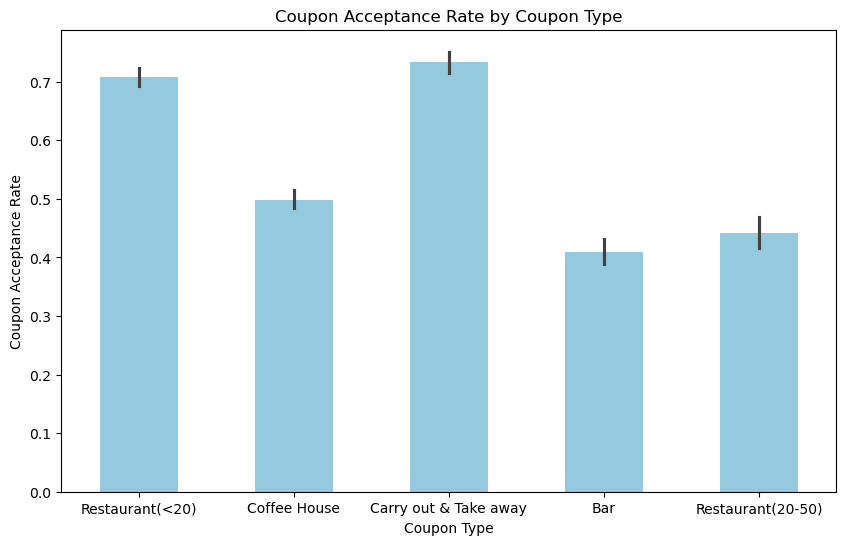

In [320]:
plt.subplots(figsize=(10, 6))
coupon_acceptance_by_type = sns.barplot(data= df, x="coupon", y="Y",width=0.5, color='skyblue')
coupon_acceptance_by_type.set_xlabel("Coupon Type",fontsize=10)
coupon_acceptance_by_type.set_ylabel("Coupon Acceptance Rate",fontsize=10)
coupon_acceptance_by_type.set_title("Coupon Acceptance Rate by Coupon Type",fontsize=12)
plt.savefig("PA1_images/coupon_acceptance_by_type.png")

6. Use a histogram to visualize the temperature column.

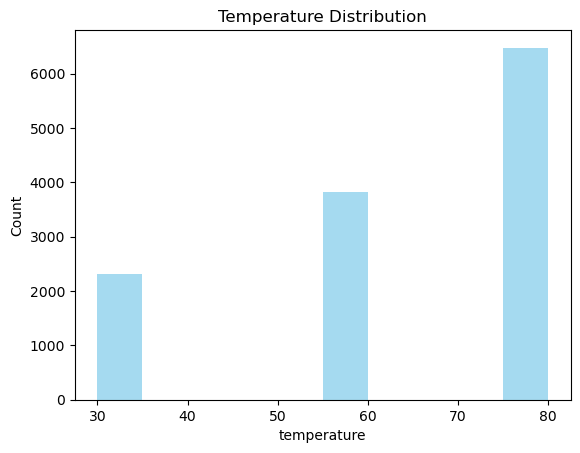

In [321]:
hist = sns.histplot(data = df, x='temperature', binwidth=5, color ="skyblue", edgecolor=None)
hist.set_title("Temperature Distribution",fontsize=12)
plt.savefig("PA1_images/temperature_distribution.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [322]:
df['coupon'].value_counts()

coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

In [323]:
bar_coupons = df.loc[df['coupon']=='Bar']
bar_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,0~1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,0~1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [324]:
bar_coupons_accepted = bar_coupons.loc[bar_coupons['Y']==1].shape[0]
bar_coupons_rejected = bar_coupons.loc[bar_coupons['Y']==0].shape[0]
bar_coupons_acceptance_rate = bar_coupons_accepted / (bar_coupons_accepted + bar_coupons_rejected)
print(f"{bar_coupons_acceptance_rate*100:.0f}","%")


41 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


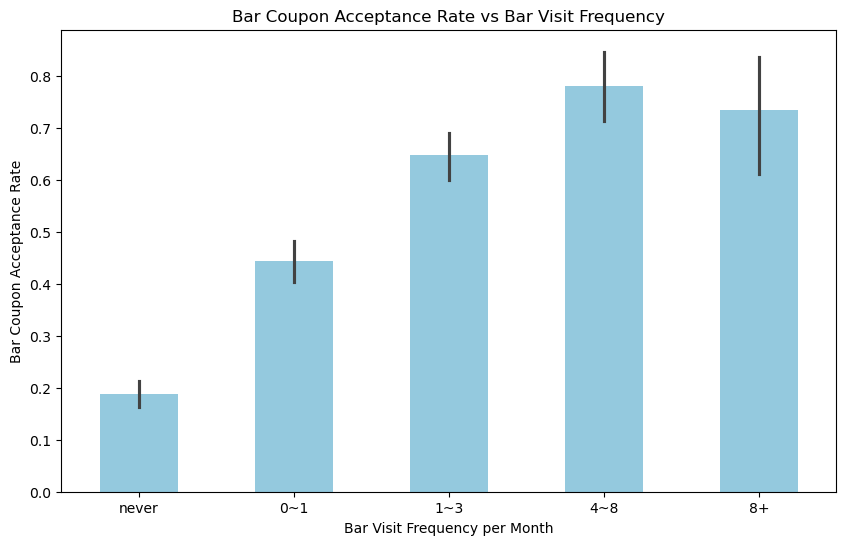

In [325]:
plt.subplots(figsize=(10, 6))
custom_order = ['never','0~1','1~3','4~8','8+']
bar_coupon_acceptance = sns.barplot(data=bar_coupons, x='Bar', y = 'Y', color='skyblue',width=0.5,order =custom_order)
bar_coupon_acceptance.set_xlabel("Bar Visit Frequency per Month",fontsize=10)
bar_coupon_acceptance.set_ylabel("Bar Coupon Acceptance Rate",fontsize=10)
bar_coupon_acceptance.set_title("Bar Coupon Acceptance Rate vs Bar Visit Frequency",fontsize=12)
plt.savefig("PA1_images/Bar_Coupon_Analysis1.png")

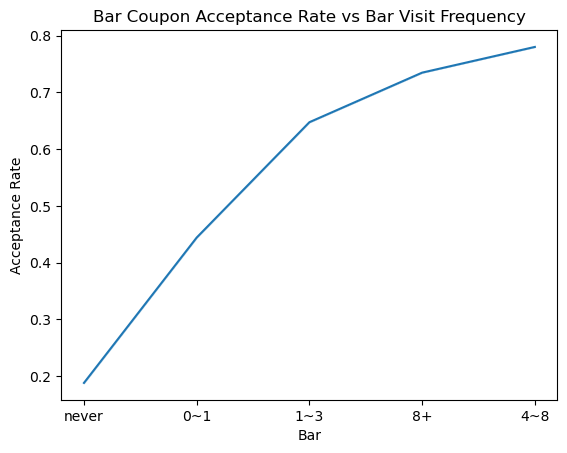

In [326]:

bar_coupons.groupby('Bar')[['Y']].mean()
bar_reset_index1= bar_coupons.set_index('Bar')
bar_reset_index1['Acceptance Rate']=bar_coupons.groupby('Bar')[['Y']].mean()
fig = sns.lineplot(data=bar_reset_index1['Acceptance Rate'])
fig.set_title("Bar Coupon Acceptance Rate vs Bar Visit Frequency",fontsize=12)
plt.savefig("PA1_images/Bar_Coupon_Analysis2.png")

In [327]:
bar_coupons.groupby('Bar')[['Y']].mean()

,Y
Bar,
0~1,0.444050
1~3,0.647355
4~8,0.780000
8+,0.734694
never,0.187952


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


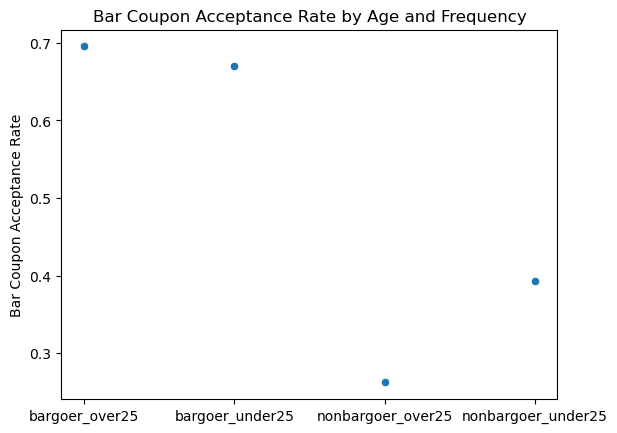

In [328]:
bargoer= ['1~3','4~8','8+']
under25 = ['21', 'below21']
bargoer_over25 = bar_coupons.query('Bar in @bargoer and age not in @under25')
bargoer_over25_Y = bargoer_over25['Y'].mean()
bargoer_under25 = bar_coupons.query('Bar in @bargoer and age in @under25')
bargoer_under25_Y = bargoer_under25['Y'].mean()
nonbargoer_over25 =bar_coupons.query('Bar not in @bargoer and age not in @under25')
nonbargoer_over25_Y =nonbargoer_over25['Y'].mean()
nonbargoer_under25 =bar_coupons.query('Bar not in @bargoer and age in @under25')
nonbargoer_under25_Y = nonbargoer_under25['Y'].mean()
a= ['bargoer_over25', 'bargoer_under25' , 'nonbargoer_over25', 'nonbargoer_under25']
b = [bargoer_over25_Y, bargoer_under25_Y , nonbargoer_over25_Y, nonbargoer_under25_Y]
fig = sns.scatterplot(x=a, y=b)
fig.set_ylabel("Bar Coupon Acceptance Rate",fontsize=10)
fig.set_title("Bar Coupon Acceptance Rate by Age and Frequency",fontsize=12)
plt.savefig('PA1_images/Bar_Coupon_Analysis3.png')

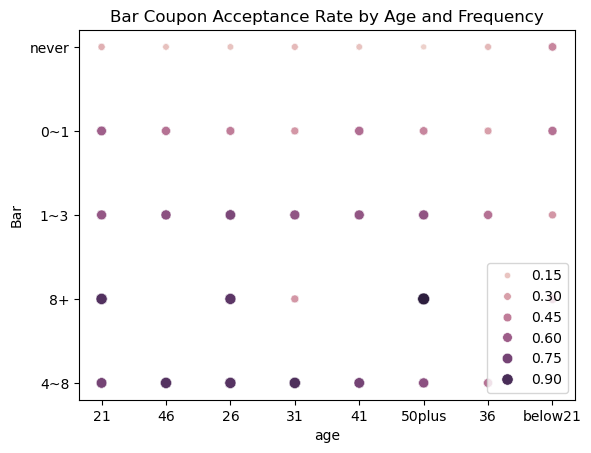

In [329]:
bar_reset_index2= bar_coupons.set_index(['Bar','age'])
bar_reset_index2['Acceptance Rate']=bar_coupons.groupby(['Bar','age'])[['Y']].mean()
a = bar_reset_index2.reset_index()
fig = sns.scatterplot(a,x='age',y='Bar', hue='Acceptance Rate', size='Acceptance Rate',legend=True)
fig.set_title("Bar Coupon Acceptance Rate by Age and Frequency",fontsize=12)
plt.legend(loc='lower right')
plt.savefig('PA1_images/Bar_Coupon_Analysis4.png')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [330]:
bargoer_df=bar_coupons.query('Bar in @bargoer')
bargoer_df['passenger'].value_counts()

passenger
Alone        356
Friend(s)    120
Partner       75
Kid(s)        45
Name: count, dtype: int64

In [331]:
passengers_not_a_kid = ['Friend(s)','Partner']

In [332]:
bargoer_df['occupation'].value_counts()

occupation
Unemployed                                   76
Student                                      70
Sales & Related                              67
Computer & Mathematical                      60
Management                                   52
Office & Administrative Support              44
Business & Financial                         28
Arts Design Entertainment Sports & Media     26
Education&Training&Library                   21
Healthcare Practitioners & Technical         18
Legal                                        17
Protective Service                           15
Food Preparation & Serving Related           15
Transportation & Material Moving             13
Installation Maintenance & Repair            11
Personal Care & Service                      11
Healthcare Support                           11
Production Occupations                       10
Construction & Extraction                     7
Architecture & Engineering                    6
Community & Social Services  

In [333]:
bargoer_df.groupby('passenger')[['Y']].mean()

,Y
passenger,
Alone,0.710674
Friend(s),0.791667
Kid(s),0.377778
Partner,0.600000


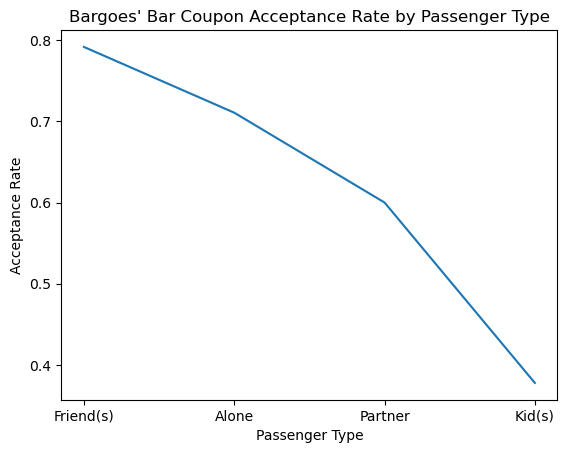

In [334]:
bargoer_reset_index= bargoer_df.set_index('passenger')
bargoer_reset_index['Acceptance Rate']=bargoer_df.groupby('passenger')[['Y']].mean()
fig = sns.lineplot(data=bargoer_reset_index['Acceptance Rate'])
fig.set_title("Bargoes' Bar Coupon Acceptance Rate by Passenger Type",fontsize=12)
fig.set_xlabel("Passenger Type",fontsize=10)
plt.savefig("PA1_images/Bar_Coupon_Analysis5.png")

In [335]:
bar_coupons['occupation'].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      229
Sales & Related                              178
Education&Training&Library                   140
Management                                   115
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

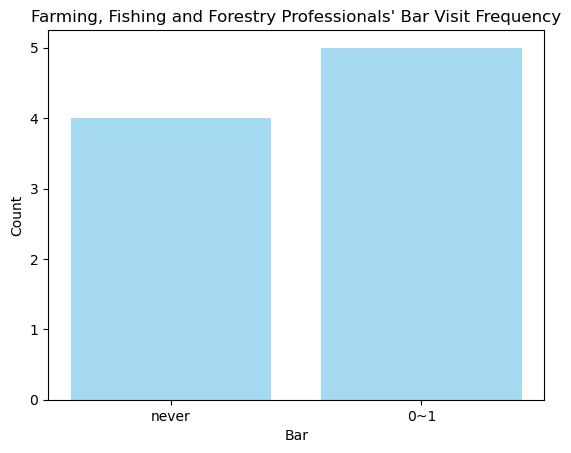

In [336]:
hist = sns.histplot(data= bar_coupons.query('occupation == "Farming Fishing & Forestry"')['Bar'],shrink=0.8, color ="skyblue", edgecolor=None)
hist.set_title("Farming, Fishing and Forestry Professionals' Bar Visit Frequency",fontsize=12)
plt.savefig("PA1_images/farmers_bar_visit.png")

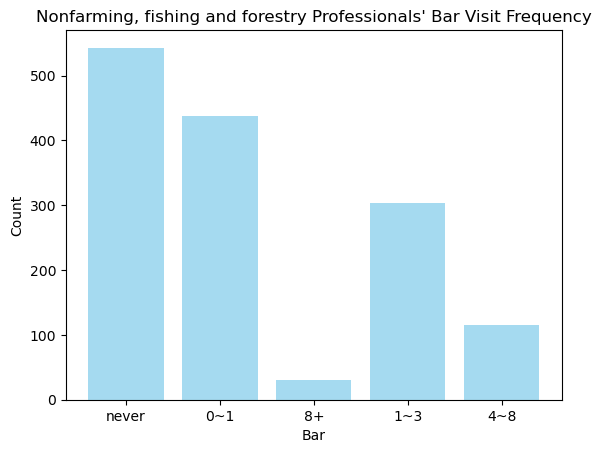

In [337]:
exceptions = ['Unemployed','Student','Farming Fishing & Forestry']
hist = sns.histplot(data= bar_coupons.query('occupation not in @exceptions')['Bar'],shrink=0.8, color ="skyblue", edgecolor=None)
hist.set_title("Nonfarming, fishing and forestry Professionals' Bar Visit Frequency",fontsize=12)
plt.savefig("PA1_images/nonfarmers_bar_visit.png")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [338]:
bar_coupons['maritalStatus'].value_counts()

maritalStatus
Married partner      875
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

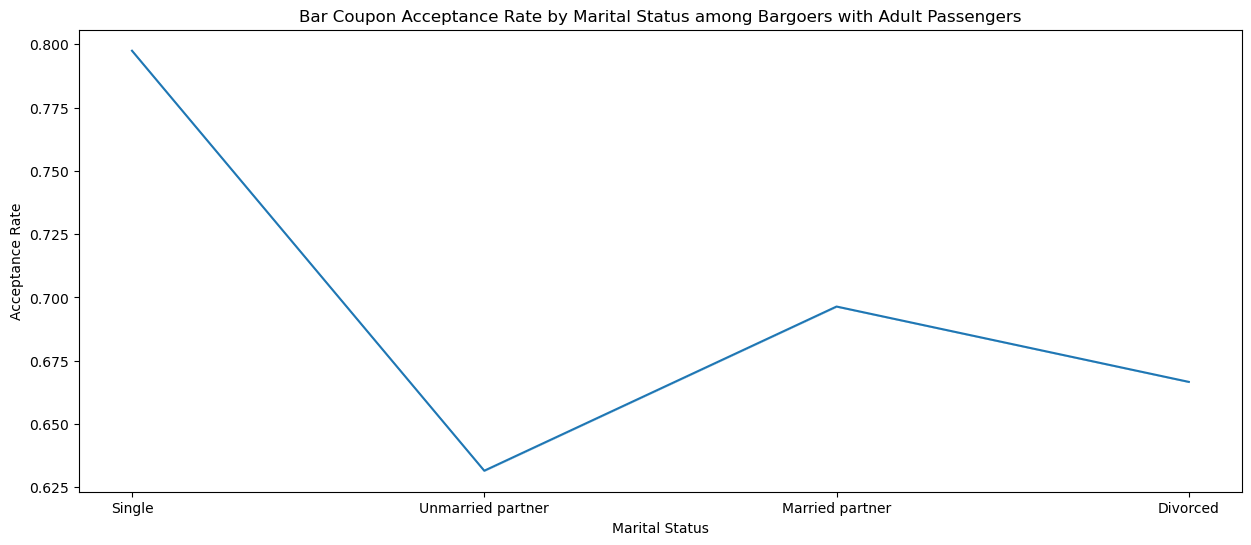

In [339]:
bargoer_with_adult_passengers = bar_coupons.query('Bar in @bargoer and passenger in @passengers_not_a_kid')
bargoer_with_adult_passengers_reset_index = bargoer_with_adult_passengers.set_index('maritalStatus')
bargoer_with_adult_passengers_reset_index['Acceptance Rate']= bargoer_with_adult_passengers.groupby('maritalStatus')[['Y']].mean()
plt.subplots(figsize=(15, 6))
fig=sns.lineplot(data=bargoer_with_adult_passengers_reset_index['Acceptance Rate'])
fig.set_title("Bar Coupon Acceptance Rate by Marital Status among Bargoers with Adult Passengers",fontsize=12)
fig.set_xlabel("Marital Status",fontsize=10)
plt.savefig("PA1_images/Bar_Coupon_Analysis6.png")


In [340]:
bar_coupons.query('maritalStatus == "Widowed"')[['maritalStatus','Bar','passenger','Y']]


,maritalStatus,Bar,passenger,Y
1261,Widowed,never,Friend(s),0
1272,Widowed,never,Alone,0
1276,Widowed,never,Alone,0
1393,Widowed,never,Friend(s),1
1404,Widowed,never,Alone,1
1408,Widowed,never,Alone,1
8219,Widowed,never,Friend(s),0
8227,Widowed,never,Alone,0
10192,Widowed,never,Alone,1
10197,Widowed,never,Alone,1


In [341]:
bar_coupons.query('maritalStatus == "Widowed"')['Y'].mean()

0.3333333333333333

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Drivers who go to bar more than once a month tend to accept bar coupons. Drivers who go to bar less than once a month tend to reject bar coupons.

### Drivers who are widowed or in the fishing, farming and forestry industry usually don't go to bars more than once a month. 

### Drivers are more willing to accept bar coupons if there are passengers in the car that are not kids, and they are less likely to accept bar coupons if there are kids in the car. 

### Businesses that are handing out bar coupons should target drivers that visit bars and have their friends in the car.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [342]:
fine_dining_coupons = df.loc[df['coupon']=='Restaurant(20-50)']
fine_dining_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,0~1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,0~1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,0~1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,0~1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


What percentage of more expensive restaurant coupons were accepted?

In [343]:
fine_dining_coupons_accepted = fine_dining_coupons.loc[fine_dining_coupons['Y']==1].shape[0]
fine_dining_coupons_rejected = fine_dining_coupons.loc[fine_dining_coupons['Y']==0].shape[0]
fine_dining_coupons_acceptance_rate = fine_dining_coupons_accepted / (fine_dining_coupons_accepted + fine_dining_coupons_rejected)
print(f"{fine_dining_coupons_acceptance_rate*100:.0f}","%")

44 %


In [344]:
fine_dining_coupons['income'].value_counts()

income
25000     227
37500     211
100000    207
12500     205
50000     201
10000     125
75000     109
87500     107
62500      96
Name: count, dtype: int64

How does income affect more expensive restaurant coupon acceptance rate?

In [345]:
pd.to_numeric(fine_dining_coupons['income'])

14        37500
18        37500
36        62500
40        62500
58        12500
          ...  
12657    100000
12661    100000
12669     75000
12676     75000
12683     75000
Name: income, Length: 1488, dtype: int64

In [346]:
fine_dining_coupons.astype({'income': 'int64'}).dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                   int64
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

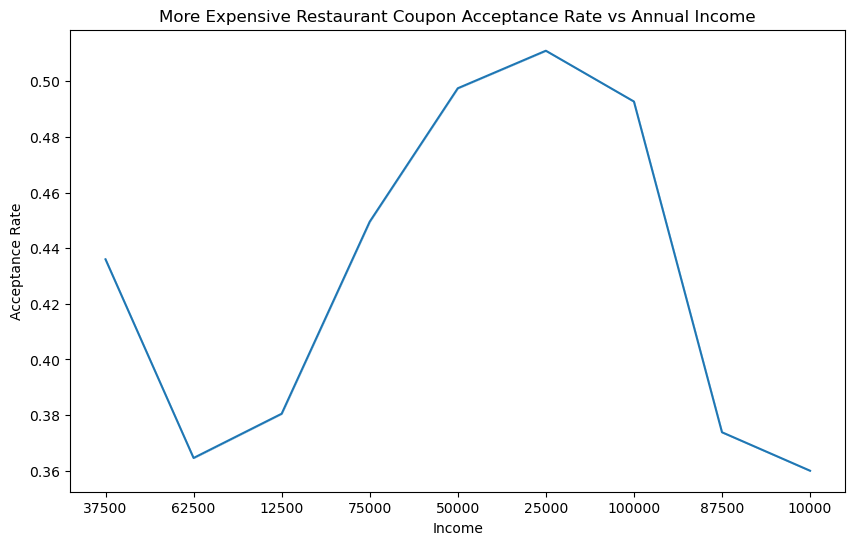

In [347]:
fine_dining_coupons.groupby('income')[['Y']].mean()
fine_dining_by_income= fine_dining_coupons.set_index('income')
fine_dining_by_income['Acceptance Rate']=fine_dining_coupons.groupby('income')[['Y']].mean()
plt.subplots(figsize=(10, 6))
fig = sns.lineplot(data=fine_dining_by_income, x='income', y='Acceptance Rate')
fig.set_title("More Expensive Restaurant Coupon Acceptance Rate vs Annual Income",fontsize=12)
fig.set_xlabel("Income",fontsize=10)
plt.savefig("PA1_images/Restaurant_Coupon_Analysis1.png")

In [348]:
fine_dining_coupons.groupby('income')[['Y']].mean().sort_values(by='income',ascending = True)

,Y
income,
10000,0.360000
100000,0.492754
12500,0.380488
25000,0.511013
37500,0.436019
50000,0.497512
62500,0.364583
75000,0.449541
87500,0.373832


Compare more expensive restaurant coupon acceptance rate among people who go frequently and infrequently.

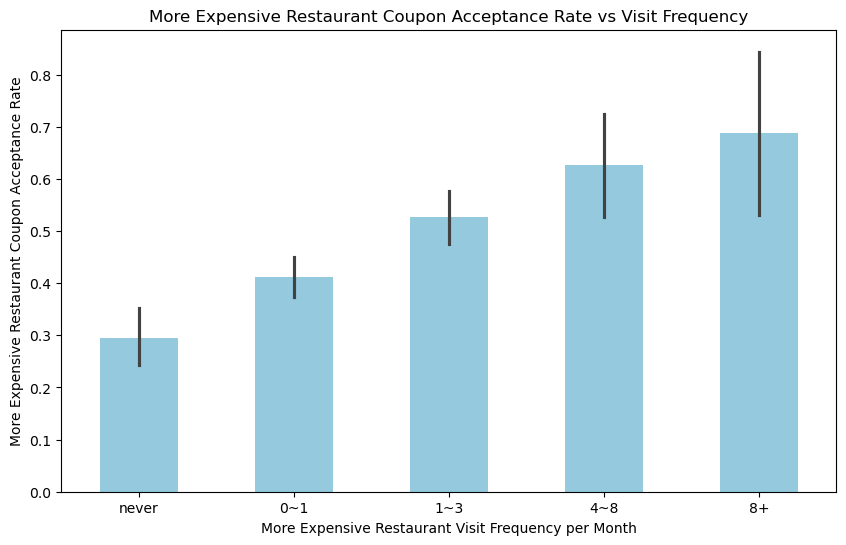

In [349]:
plt.subplots(figsize=(10, 6))
custom_order = ['never','0~1','1~3','4~8','8+']
fine_dining_coupon_acceptance = sns.barplot(data=fine_dining_coupons, x='Restaurant20To50', y = 'Y', color='skyblue',width=0.5,order =custom_order)
fine_dining_coupon_acceptance.set_xlabel("More Expensive Restaurant Visit Frequency per Month",fontsize=10)
fine_dining_coupon_acceptance.set_ylabel("More Expensive Restaurant Coupon Acceptance Rate",fontsize=10)
fine_dining_coupon_acceptance.set_title("More Expensive Restaurant Coupon Acceptance Rate vs Visit Frequency",fontsize=12)
plt.savefig("PA1_images/Restaurant_Coupon_Analysis2.png")

Compare more expensive restaurant coupon acceptance rate among people with different marital status.

In [350]:
fine_dining_coupons.query('maritalStatus == "Widowed"')['Y'].mean()

0.23529411764705882

In [351]:
fine_dining_coupons.query('maritalStatus == "Married partner"')['Y'].mean()

0.41898527004909986

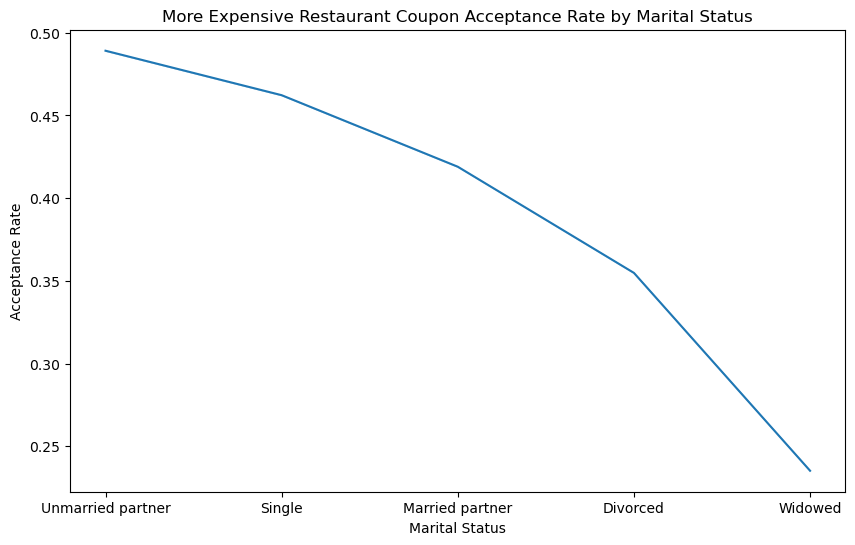

In [352]:
fine_dining_coupons.reset_index()
fine_dining_by_marital= fine_dining_coupons.set_index('maritalStatus')
fine_dining_by_marital['Acceptance Rate']=fine_dining_coupons.groupby('maritalStatus')[['Y']].mean()
plt.subplots(figsize=(10, 6))
fig = sns.lineplot(data=fine_dining_by_marital, x='maritalStatus', y='Acceptance Rate')
fig.set_title("More Expensive Restaurant Coupon Acceptance Rate by Marital Status",fontsize=12)
fig.set_xlabel("Marital Status",fontsize=10)
plt.savefig("PA1_images/Restaurant_Coupon_Analysis3.png")

How does age affect more expensive restaurant coupon acceptance rate?

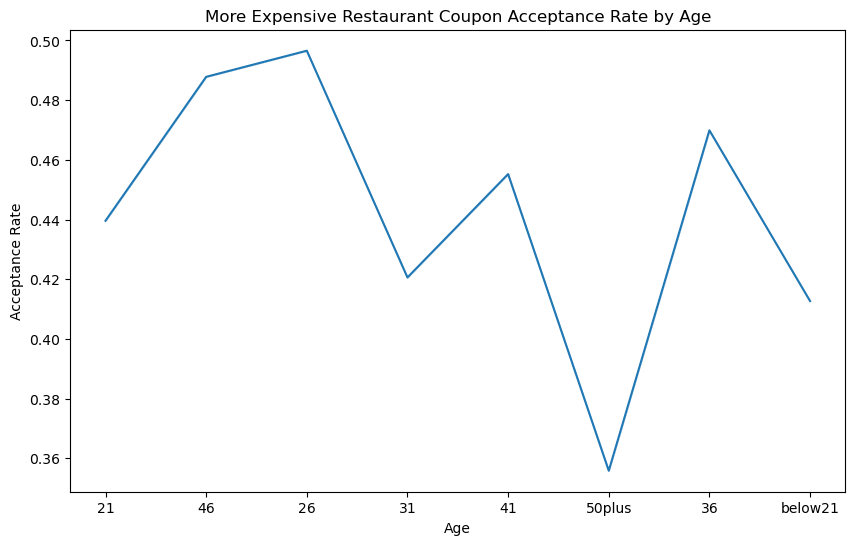

In [353]:
fine_dining_coupons.reset_index()
fine_dining_by_age= fine_dining_coupons.set_index('age')
fine_dining_by_age['Acceptance Rate']=fine_dining_coupons.groupby('age')[['Y']].mean()
plt.subplots(figsize=(10, 6))
fig = sns.lineplot(data=fine_dining_by_age, x='age', y='Acceptance Rate')
fig.set_title("More Expensive Restaurant Coupon Acceptance Rate by Age",fontsize=12)
fig.set_xlabel("Age",fontsize=10)
plt.savefig("PA1_images/Restaurant_Coupon_Analysis4.png")

Compare more expensive restaurant coupon acceptance rate among drivers who go to more expensive retaurants at least once a month that have different kinds of passengers in the car.

In [354]:
more_than_once = ['1~3','4~8','8+']
fine_diner = fine_dining_coupons.query('Restaurant20To50 in @more_than_once')
fine_diner['passenger'].value_counts()

passenger
Alone        332
Kid(s)        62
Friend(s)     58
Partner       52
Name: count, dtype: int64

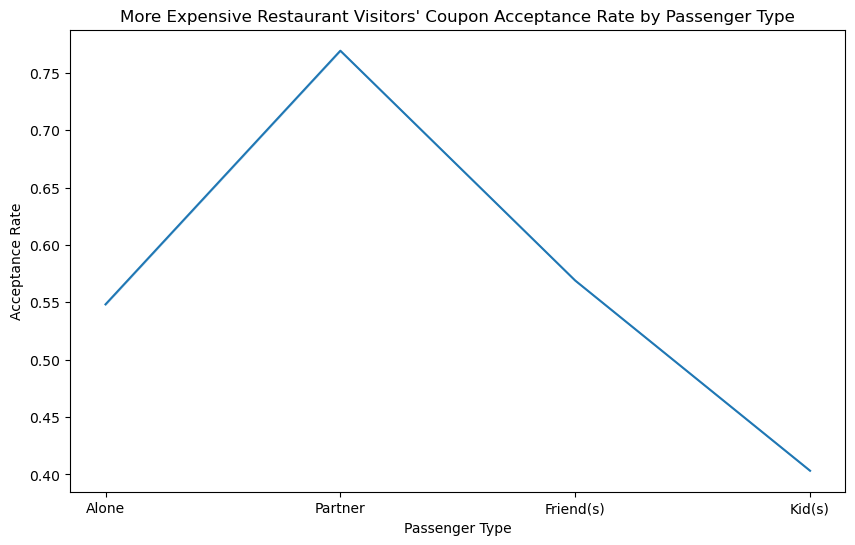

In [355]:
fine_diner_by_passenger= fine_diner.set_index('passenger')
fine_diner_by_passenger['Acceptance Rate']=fine_diner.groupby('passenger')[['Y']].mean()
plt.subplots(figsize=(10, 6))
fig = sns.lineplot(data=fine_diner_by_passenger['Acceptance Rate'])
fig.set_title("More Expensive Restaurant Visitors' Coupon Acceptance Rate by Passenger Type",fontsize=12)
fig.set_xlabel("Passenger Type",fontsize=10)
plt.savefig("PA1_images/Restaurant_Coupon_Analysis5.png")

### How often a driver visits a more expensive restaurant has a strong positive correlation with how likely the driver is going to accept the coupon.

### Driver's income has no significant impact on more expensive restaurant coupon acceptance rate.

### People who are widowed and are over the age of 50 are unlikely to accept the coupons to a more expensive restaurant.

### People are more likely to accept more expensive restaurant coupons when they are driving with their partners and less likely to accept them when they are driving with kids.

### Businesses that are handing out more expensive restaurant coupons has the best chance with drivers who like to dine at nice restaurants and have their partners in the car.
